In [31]:
import numpy as np

fruits = np.load('../../ml/data/fruits_300_copy.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [32]:
from sklearn.decomposition import PCA

In [33]:
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [34]:
pca.n_components_

50

In [35]:
pca.components_.shape

(50, 10000)

In [36]:
pca.components_

array([[-9.24490195e-06, -5.10601298e-06, -8.91640398e-06, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.69701616e-05,  1.13551051e-05,  1.82152565e-05, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.65220453e-05, -2.08401736e-05, -2.89870106e-05, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       ...,
       [ 1.19543677e-05, -3.38050390e-05, -5.48769774e-06, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-7.05147807e-05, -4.29210723e-06, -3.15954786e-05, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-7.38244828e-05,  1.03169304e-04,  7.71556243e-05, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [37]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

In [38]:
len(pca.components_)

50

In [39]:
pca.components_.shape

(50, 10000)

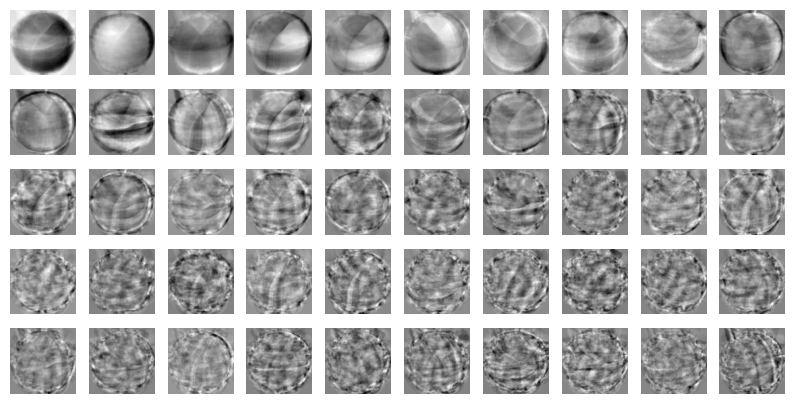

In [40]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [41]:
fruits_pca = pca.transform(fruits_2d)

In [42]:
print(fruits_pca.shape)

(300, 50)


In [43]:
# 원본 데이터 재구성

In [44]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [45]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

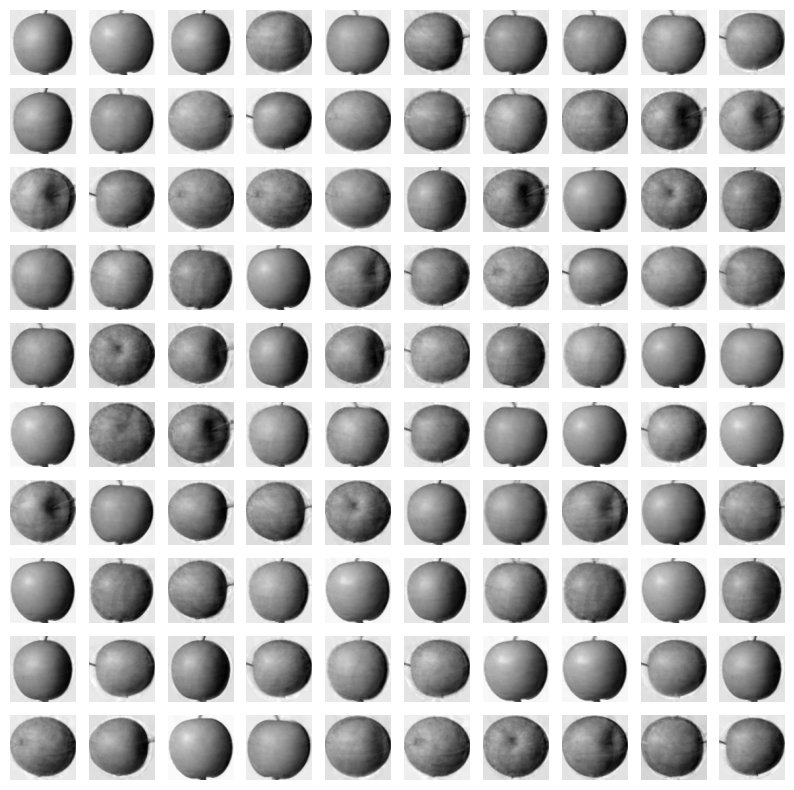

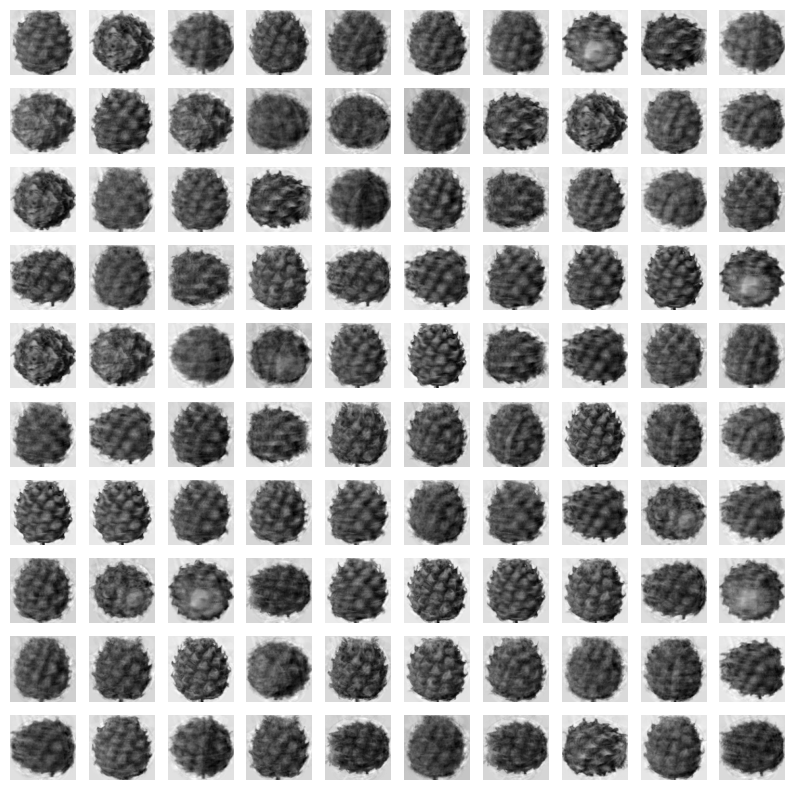

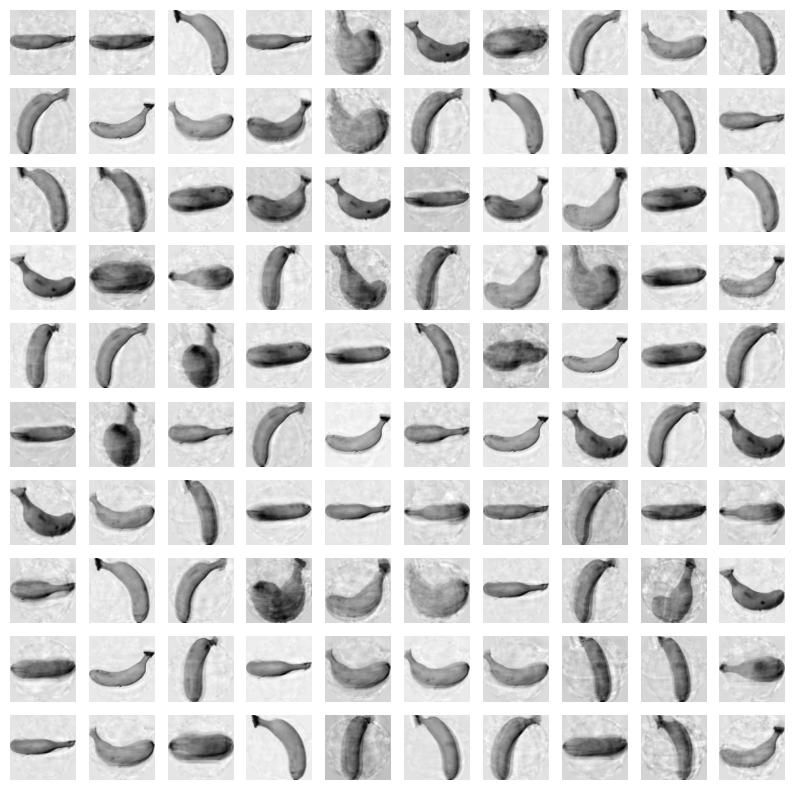

In [46]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

In [47]:
print(np.sum(pca.explained_variance_ratio_))

0.9215255508187906


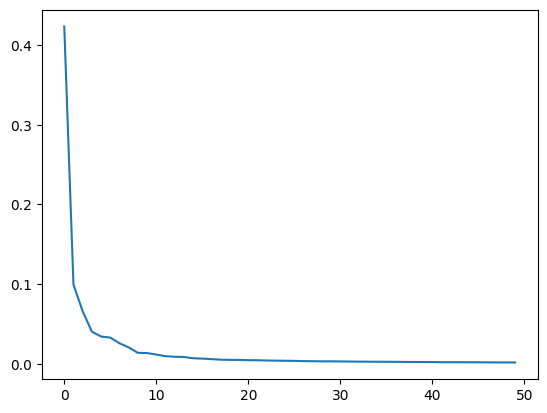

In [48]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [49]:
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578895, 0.00511201, 0.00486383, 0.00480348,
       0.00447836, 0.00437318, 0.00408037, 0.00389472, 0.00372435,
       0.00359278, 0.00331474, 0.00317769, 0.00304207, 0.00303767,
       0.00288831, 0.00275716, 0.00264934, 0.00255874, 0.00251778,
       0.00247374, 0.00239566, 0.00230284, 0.00222101, 0.0021532 ,
       0.00213828, 0.00195876, 0.00192246, 0.00189699, 0.00185119,
       0.00182708, 0.00172372, 0.00169589, 0.00162417, 0.00159307])

In [50]:
sum(pca.explained_variance_ratio_)

0.9215255508187906

## 차원 축소 후에도 모델의 성능이 줄어들지 않는지 검증

In [51]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [52]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [53]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.1950521945953369


In [54]:
fruits_2d.shape

(300, 10000)

In [55]:
scores2 = cross_validate(lr, fruits_pca, target)
print(np.mean(scores2['test_score']))
print(np.mean(scores2['fit_time']))

0.9966666666666667
0.008244705200195313


In [57]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

c:\ProgramData\anaconda3\envs\cv\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [58]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2]), array([112,  98,  90], dtype=int64))


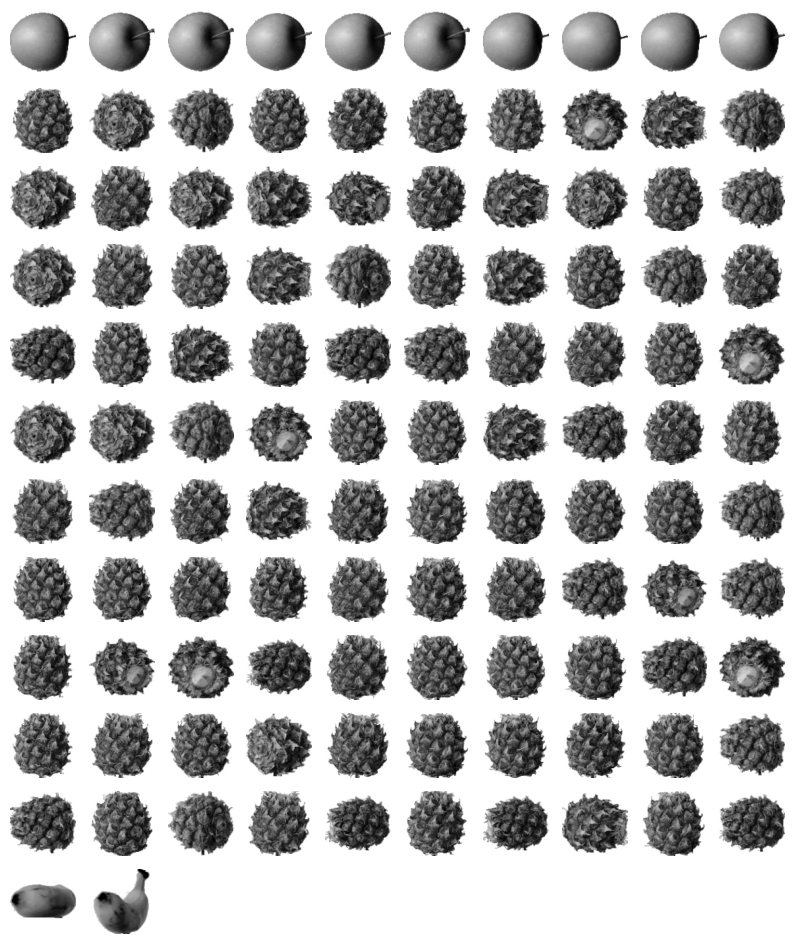

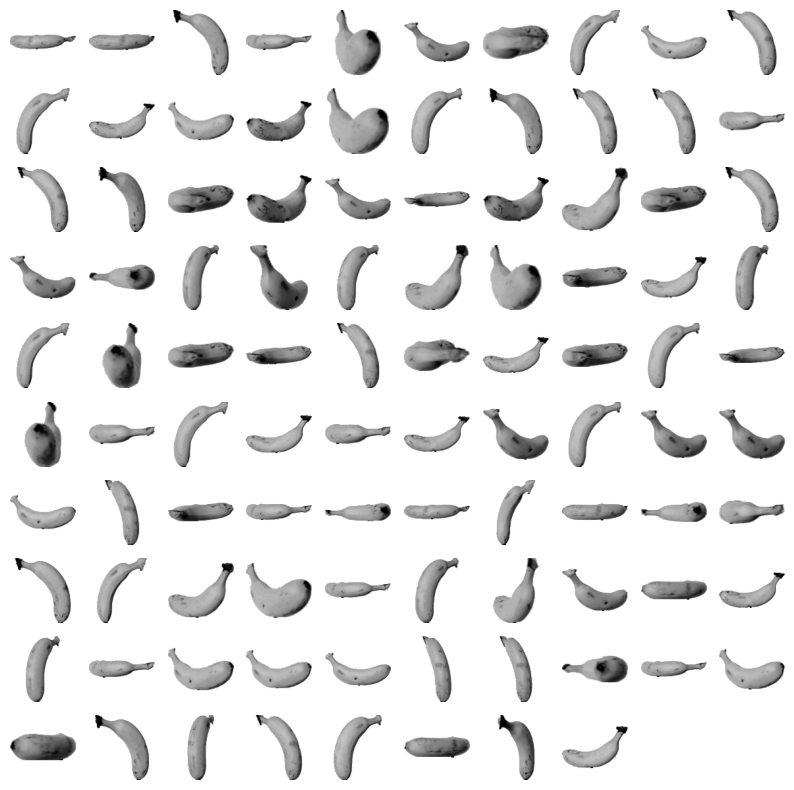

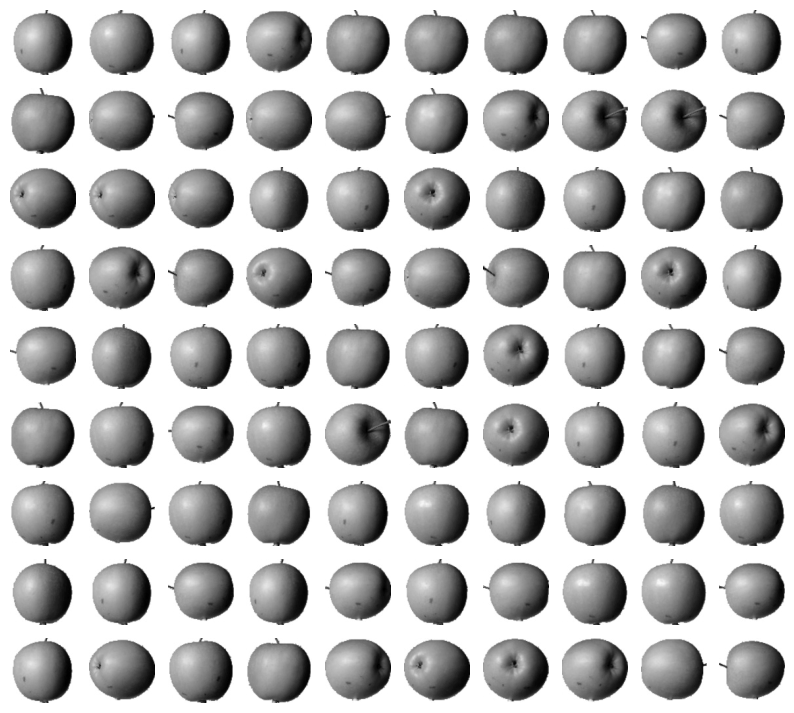

In [59]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

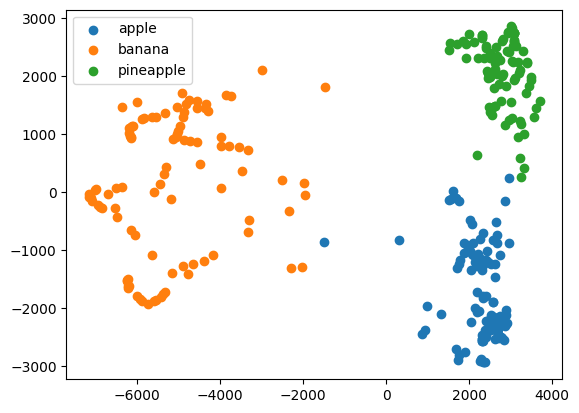

In [60]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

In [ ]:
# 6-3 확인문제
# 1. 2
# 2. 1
# 3. 1